# Analisis Data Eksploratif (Python)

In this project, data analysis will be carried out for several taxi companies, the most destination areas or locations and travel data from the Loop to O'Hare International Airport.

The purpose of this analysis is to find out:
1. which taxi companies are in great demand
2. the location or destinations most frequently visited by taxis
3. whether weather conditions affect the average duration of a trip.

The main stages of this data analysis include:
1. Prepare data and understand data information
2. Analyze data
3. Test the hypothesis

## Data Pre-processing

In [2]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st
import math as mt
import seaborn as sns

## Importing Files

In [2]:
# Load the data file into a DataFrame
data_company = pd.read_csv('/datasets/project_sql_result_01.csv')

In [3]:
data_chicago = pd.read_csv('/datasets/project_sql_result_04.csv')

## Studying Data contents

This dataset contains the following columns:
- `company_name`
- `trips_amount`

In [25]:
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
data_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


This dataset contains the following columns:
- `dropoff_location_name`
- `average_trips`

In [24]:
data_chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
data_chicago.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


## Check Data Type

In [8]:
data_company.dtypes

company_name    object
trips_amount     int64
dtype: object

In [9]:
data_chicago.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

After checking the data type on these two datasets, there are no data need to be corrected or changed, all the data seems fine and match with all the types.

## Identify The Top 10 Regions

In [10]:
data_chicago.sort_values(by='average_trips', ascending=False).head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## Create Graphs

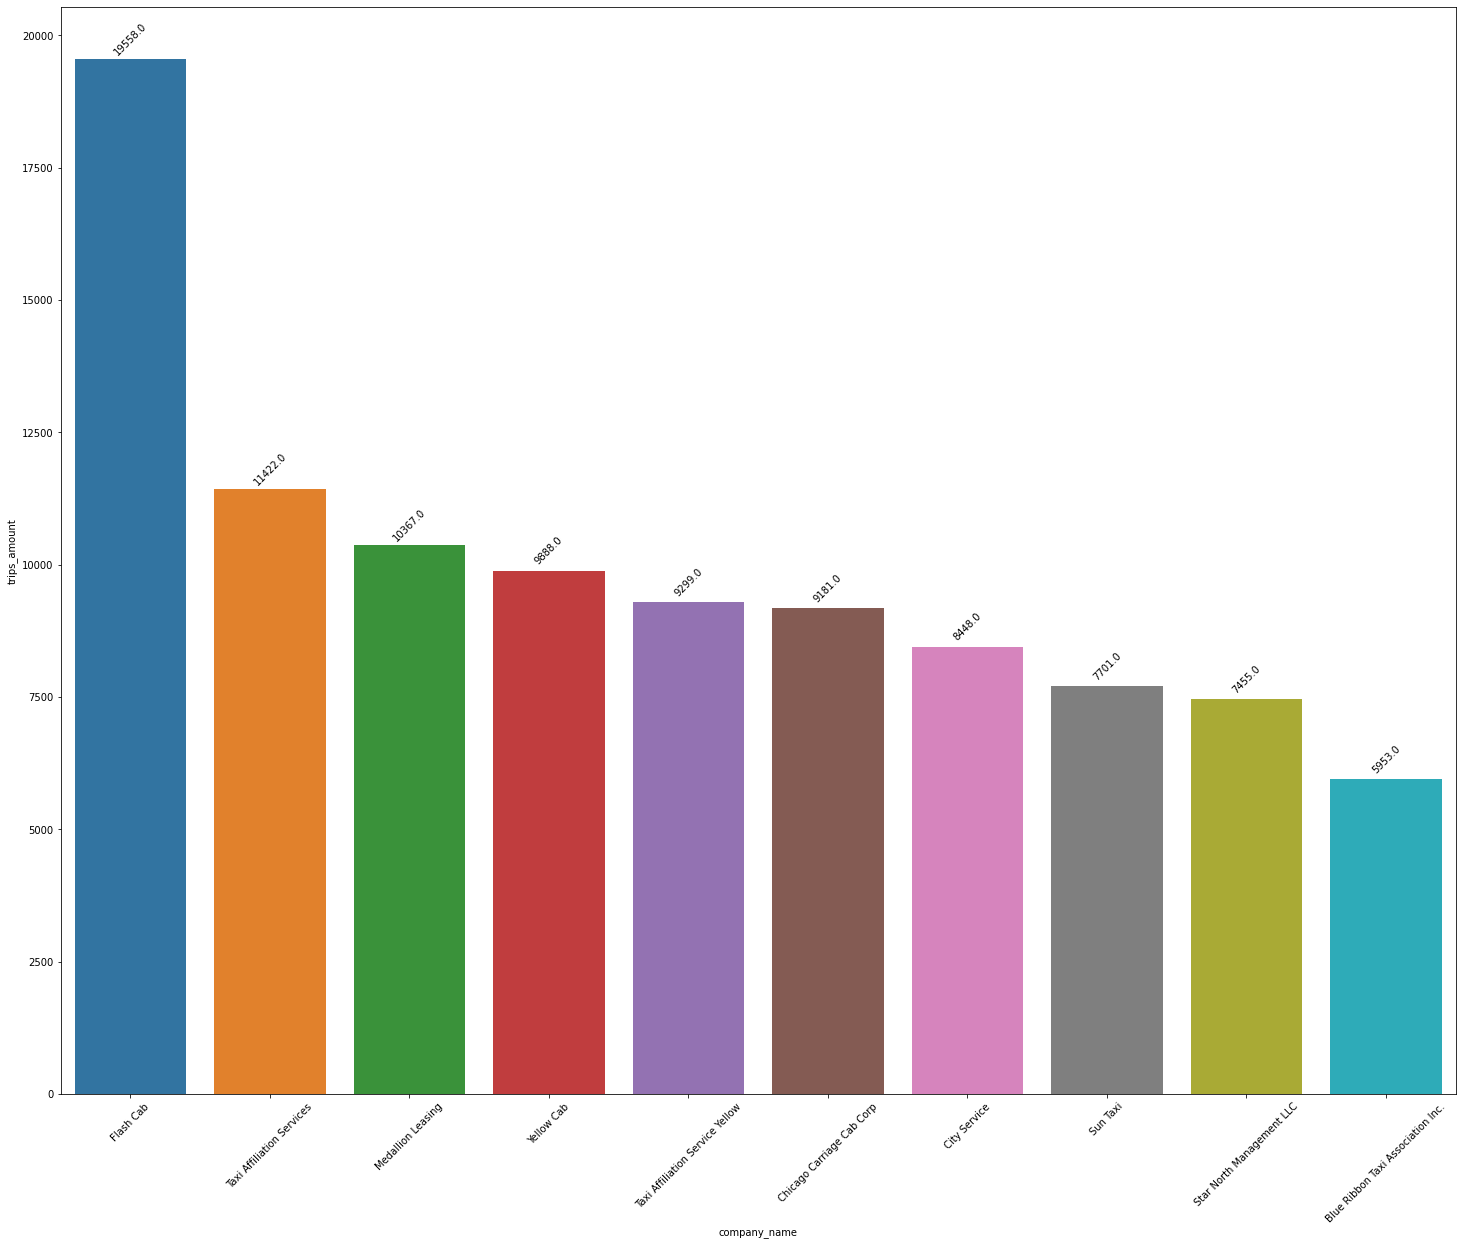

In [11]:
#taxi companies and the number of trips
taxi_companies = data_company.sort_values(by='trips_amount', ascending=False).head(10)

plt.figure(figsize=(25,20))
splot = sns.barplot(data=taxi_companies, x='company_name', y='trips_amount')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

The graphic bar illustrates that Flash Cab taxi is the most famous taxi company and is most in demand by passengers as indicated by the large number of trips of nearly 20,000 trips.

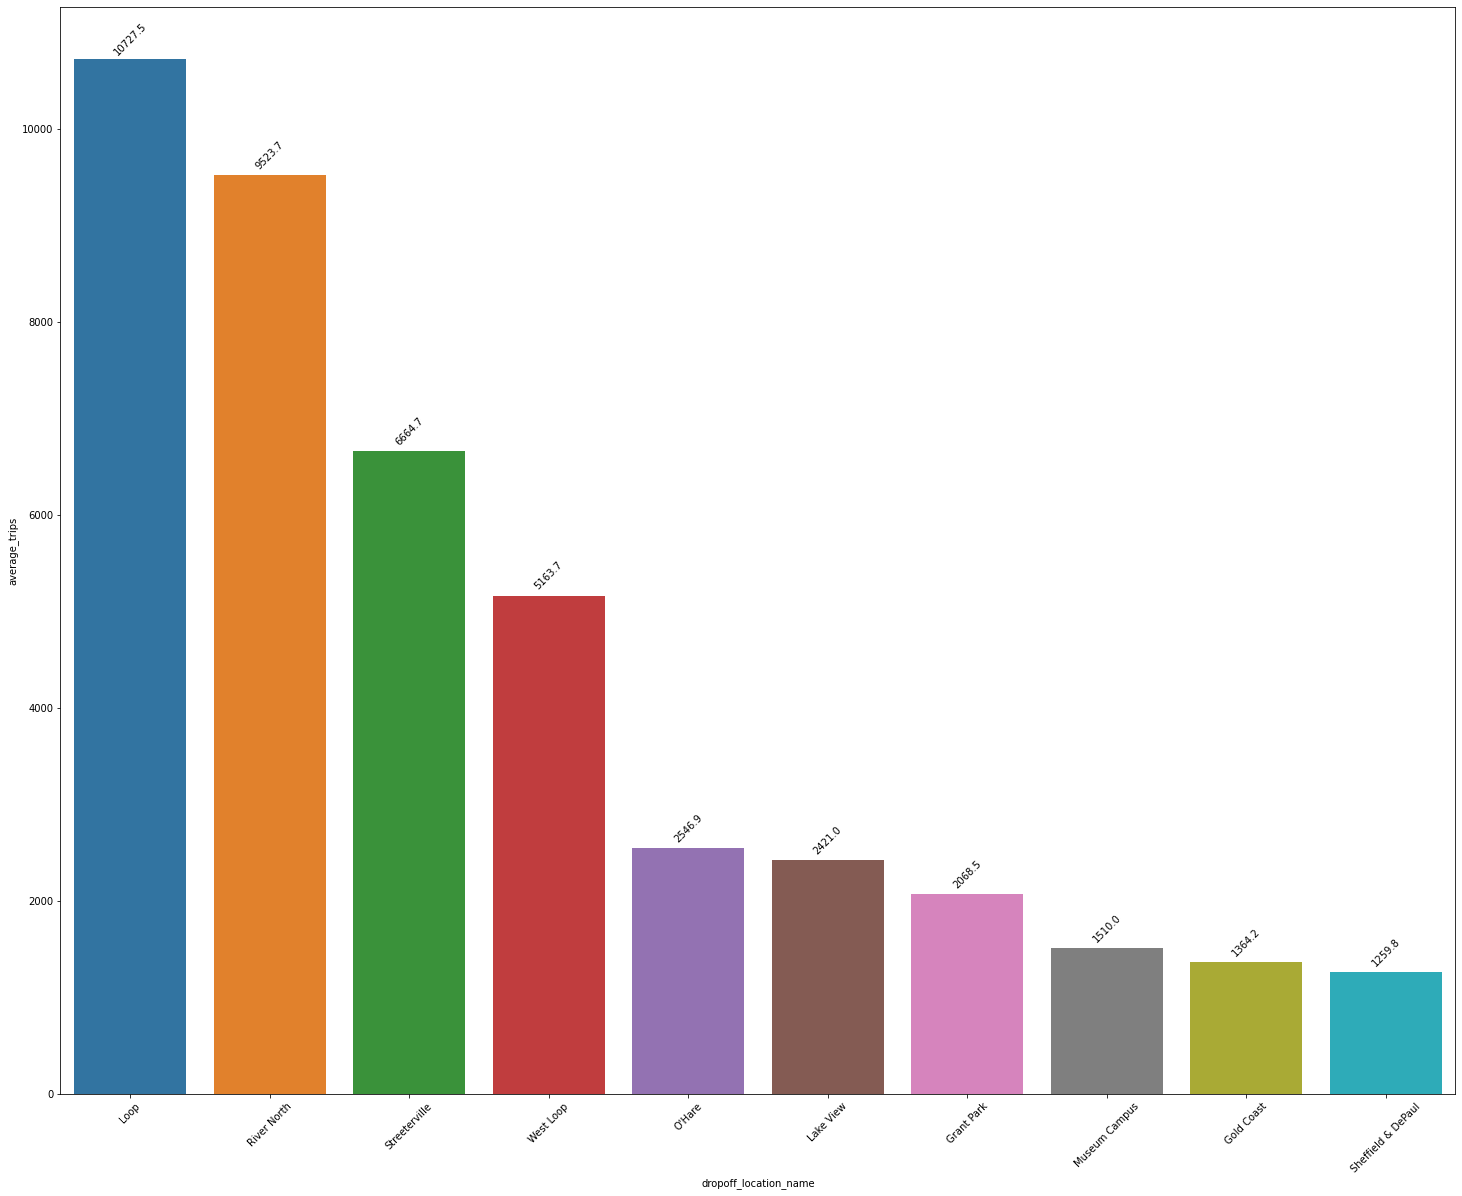

In [12]:
top_10_region = data_chicago.sort_values(by='average_trips', ascending=False).head(10)

plt.figure(figsize=(25,20))
splot = sns.barplot(data=top_10_region , x='dropoff_location_name', y='average_trips')

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 20), rotation=45,
                   textcoords = 'offset points')

plt.xticks(rotation = 45)
plt.show()

It can be seen from the bar graph, shows that the Loop region holds the 1st rank (10,727.5) as the destination for the most passengers getting off compared to the other 9 locations, with a total of more than 10,000 trips. Followed by River North, Streetville, and West Loop (5,100 - 9,500 trips).

Furthermore, three different regions have total trips in around 2000 such as O´Hare, Lake View, and Grant Park. Lastly, the last 3 bottom parts which are Museum Campus, Gold Coast, and Sheffield & DePaul only have the least total number of destinations approximately 1,000 - 1,500 trips.

# Testing Hypotheses (Python)

This dataset shows a trip from the Loop to O'Hare International Airport also contains the following columns:
- `start_ts` for date and time
- `weather_conditions`
- `duration_seconds`

In [13]:
data_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [23]:
data_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
data_trips.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [16]:
data_trips.weather_conditions.unique()

array(['Good', 'Bad'], dtype=object)

From the data shown above, we can take a hypothesis test by using `weather_condition` column which has the values'Good' and 'Bad' from the column's value.

## Hypotheses Test

H0: The average trip duration from the Loop to O'Hare International Airport does not change on rainy Saturdays

H1: The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays

In [17]:
sample_1 = data_trips[data_trips['weather_conditions'] == 'Good']['duration_seconds']
sample_2 = data_trips[data_trips['weather_conditions'] == 'Bad']['duration_seconds']

In [18]:
sample_1

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64

In [19]:
sample_2

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64

In [20]:
# Hypothesis test
alpha = 0.05
results = st.ttest_ind(sample_1, sample_2, equal_var=True)

In [21]:
results.pvalue

6.517970327099473e-12

In [22]:
if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Reject the null hypothesis


It can be seen from the result of the p-value of 6.52x10<sup>-12</sup> (much smaller than the alpha value) is that it successfully rejects H0, which means that The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Final Conclusion

In this project, data analysis will be carried out for several taxi companies, the most destination areas or locations and travel data from the Loop to O'Hare International Airport.

The main stages of this analysis process are as follows:
- Prepare data
- Analyze data
- Test the hypothesis

From the final results of the analysis process it can be concluded that:
1. Flash Cab taxi is the most famous taxi company and is most in demand by passengers as indicated by the large number of trips of nearly 20,000 trips.
2. Loop region hold the 1st rank (10,727.5) as the destination for the most passengers getting off compared to other 9 locations, with a total of more than 10,000 trips. Following by River North, Streetville and West Loop ( 5,100 - 9,500 trips).
3. Furthermore, there are three diffrent regions which have total trips in around 2000 such as O´Hare, Lake View and Grant Park. Lastly, the last 3 bottom parts which are Museum Campus, Gold Coast and Sheffield & DePaul only have the least total number of destinations approximately 1,000 - 1,500 trips.
4. we can take a hypothesis test by using weather_condition column which has the values'Good' and 'Bad' from the column's value.
5. the result of the p-value of 6.52x10-12 (much smaller than the alpha value) is that it successfully rejects H0, which means that The average trip duration from the Loop to O'Hare International Airport changes on rainy Saturdays.
